In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Bias Indication

In [7]:
def get_diff(df,minus_col, to_minus_col, remain_col):
    new_data_frame = pd.DataFrame()
    if not isinstance(minus_col, list) :
        to_m_col = [to_m_col]
    if not isinstance(to_minus_col, list) :
        to_minus_col = [to_minus_col]

    for mcol in minus_col:
        for to_m_col in to_minus_col:
            new_data_frame[f'{mcol} - {to_m_col}'] = df[mcol] - df[to_m_col]

    new_data_frame[remain_col] = df[remain_col]
    return new_data_frame

In [8]:
import scipy.stats as stats
def anova_for_cv_test(df):
    s, p_cv_te = stats.f_oneway(df['cv'], df['mse_te'])
    s, p_cv_te_gen = stats.f_oneway(df['cv'], df['mse_gen'])
    return p_cv_te, p_cv_te_gen


### Comparison of Non regularization

In [9]:
dir = '../../simulation_output/usemaf/'
blup_100_100 = '../../simulation_output/usemaf/blup_0_reg_cv_correction_100_fixed_100_large.csv'
gls_100_100 = '../../simulation_output/usemaf/gls_0_reg_cv_correction_100_fixed_100_large.csv'
ols_100_100 = '../../simulation_output/usemaf/ols_0_reg_cv_correction_100_fixed_100_large.csv'

blup_df = pd.read_csv(blup_100_100)
gls_df = pd.read_csv(gls_100_100)
ols_df = pd.read_csv(ols_100_100)

In [10]:
print('ols anova:', anova_for_cv_test(ols_df))
print('gls anova:', anova_for_cv_test(gls_df))
print('blup anova:', anova_for_cv_test(blup_df))

ols anova: (0.9290164028797242, 1.305196949863667e-17)
gls anova: (0.7938909390195843, 0.0043666991116523245)
blup anova: (0.7592707180244747, 6.414886755561351e-20)


In [11]:
temp_column = ["cv", "mse_te", "mse_gen"]
ols_df_short = ols_df[temp_column]
gls_df_short = gls_df[temp_column]
blup_df_short = blup_df[temp_column]

In [12]:
ols_df_short['method'] = 'ols'
gls_df_short['method'] = 'gls'
blup_df_short['method'] = 'blup'
non_reg_method = pd.concat([ols_df_short, gls_df_short, blup_df_short])
non_reg_method_melted = non_reg_method.melt(id_vars='method')

C:\Users\Archibald\AppData\Local\Temp\ipykernel_3268\2356596707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ols_df_short['method'] = 'ols'
C:\Users\Archibald\AppData\Local\Temp\ipykernel_3268\2356596707.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gls_df_short['method'] = 'gls'
C:\Users\Archibald\AppData\Local\Temp\ipykernel_3268\2356596707.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [13]:
ols_nonreg_diff = get_diff(ols_df_short, ['mse_te','mse_gen'], 'cv', 'method')
gls_nonreg_diff = get_diff(gls_df_short, ['mse_te','mse_gen'], 'cv', 'method')
blup_nonreg_diff = get_diff(blup_df_short, ['mse_te','mse_gen'], 'cv', 'method')

nonreg = pd.concat([ols_nonreg_diff, gls_nonreg_diff, blup_nonreg_diff])
nonreg_diff_melted = nonreg.melt(id_vars='method')

Text(0.5, 1.0, 'Difference of Test Error and CV')

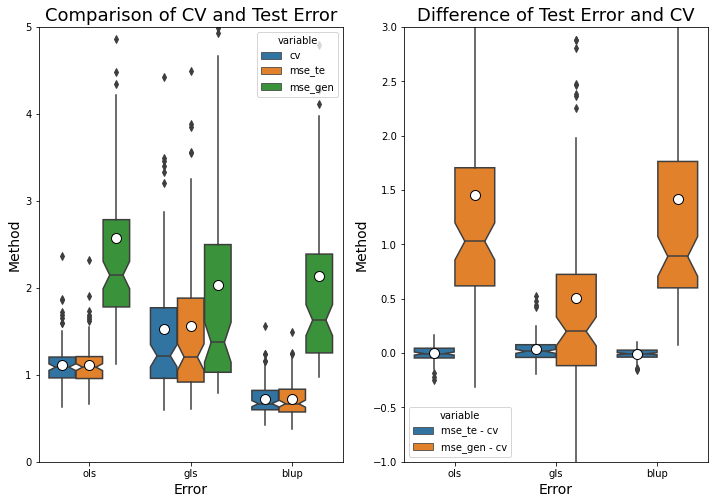

In [14]:
# Create the boxplot
plt.close('all')
fig, ax = plt.subplots(1,2, figsize=(12, 8))

gfg = sns.boxplot(x='method', y='value', hue='variable',data=non_reg_method_melted, showmeans=True, 
            notch=True, showcaps=False,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"},
                       ax = ax[0])
ax[0].set_ylabel('Method', size=14)
ax[0].set_xlabel('Error', size=14)
ax[0].set_title('Comparison of CV and Test Error', size=18)
gfg.set_ylim(0, 5)

gfg=sns.boxplot(x='method', y='value', hue='variable',
            data=nonreg_diff_melted, showmeans=True, 
            notch=True, showcaps=False,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"},
                       ax = ax[1])
gfg.set_ylim(-1, 3)
ax[1].set_ylabel('Method', size=14)
ax[1].set_xlabel('Error', size=14)
ax[1].set_title('Difference of Test Error and CV', size=18)

### Comparison of regularization regression

In [15]:
ols_lasso_100_100= '../../simulation_output/usemaf/ols_10.0_reg_1.00_l1_cv__100_fixed_100_large.csv'
ols_enet_100_100= '../../simulation_output/usemaf/ols_10.0_reg_0.50_l1_cv__100_fixed_100_large.csv'
ols_ridge_100_100= '../../simulation_output/usemaf/ols_10.0_reg_0.00_l1_cv_correction_100_fixed_100_large.csv'
ols_ridge = pd.read_csv(ols_ridge_100_100)
ols_enet = pd.read_csv(ols_enet_100_100)
ols_lasso = pd.read_csv(ols_lasso_100_100)

In [16]:
temp_col = ['cv', 'mse_te', 'mse_gen']
ols_ridge_short = ols_ridge[temp_col]
ols_enet_short = ols_enet[temp_col]
ols_lasso_short = ols_lasso[temp_col]


In [17]:
print('ridge anova:', anova_for_cv_test(ols_ridge))
print('enet anova:', anova_for_cv_test(ols_enet))
print('lasso anova:', anova_for_cv_test(ols_lasso))

ridge anova: (0.9534806360349956, 3.941167934078431e-26)
enet anova: (0.9399361600130701, 7.548480234709068e-13)
lasso anova: (0.938087810053437, 2.204971969789729e-08)


In [18]:

ols_ridge_short['method'] = 'ridge'
ols_enet_short['method'] = 'enet'
ols_lasso_short['method'] = 'lasso'
reg_method = pd.concat([ols_ridge_short, ols_enet_short, ols_lasso_short])
reg_method_melted = reg_method.melt(id_vars='method')

C:\Users\Archibald\AppData\Local\Temp\ipykernel_3268\2659176238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ols_ridge_short['method'] = 'ridge'


In [19]:
ols_ridge_diff = get_diff(ols_ridge_short, ['mse_te','mse_gen'], 'cv', 'method')
ols_enet_diff = get_diff(ols_enet_short, ['mse_te','mse_gen'], 'cv', 'method')
ols_lasso_diff = get_diff(ols_lasso_short, ['mse_te','mse_gen'], 'cv', 'method')

reg_method_diff = pd.concat([ols_ridge_diff, ols_enet_diff, ols_lasso_diff])
reg_method_diff_melted = reg_method_diff.melt(id_vars='method')

Text(0.5, 1.0, 'Difference of Test Error and CV')

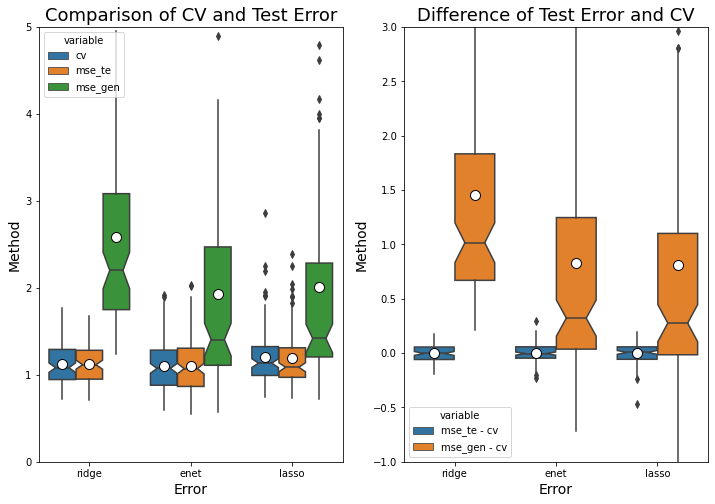

In [20]:
# Create the boxplot
plt.close('all')
fig, ax = plt.subplots(1,2, figsize=(12, 8))

gfg = sns.boxplot(x='method', y='value', hue='variable',
            data=reg_method_melted, showmeans=True, 
            notch=True, showcaps=False,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"},
                       ax = ax[0])
ax[0].set_ylabel('Method', size=14)
ax[0].set_xlabel('Error', size=14)
ax[0].set_title('Comparison of CV and Test Error', size=18)
gfg.set_ylim(0, 5)

gfg=sns.boxplot(x='method', y='value', hue='variable',
            data=reg_method_diff_melted, showmeans=True, 
            notch=True, showcaps=False,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"},
                       ax = ax[1])
gfg.set_ylim(-1, 3)
ax[1].set_ylabel('Method', size=14)
ax[1].set_xlabel('Error', size=14)
ax[1].set_title('Difference of Test Error and CV', size=18)

### Comparison of Ridge regressions

In [21]:
gls_ridge_100_100 = '../../simulation_output/usemaf/gls_10.0_reg_0.00_l1_cv_correction_100_fixed_100_large.csv'
blup_ridge_100_100 = '../../simulation_output/usemaf/blup_10.0_reg_0.00_l1_cv_correction_100_fixed_100_large.csv'
ols_ridge_100_100= '../../simulation_output/usemaf/ols_10.0_reg_0.00_l1_cv_correction_100_fixed_100_large.csv'
ols_ridge = pd.read_csv(ols_ridge_100_100)
blup_ridge = pd.read_csv(blup_ridge_100_100)
gls_ridge = pd.read_csv(gls_ridge_100_100)

In [22]:
temp_column = ["cv", "mse_te", "mse_gen"]
ols_ridge_short = ols_ridge[temp_column]
gls_ridge_short = gls_ridge[temp_column]
blup_ridge_short = blup_ridge[temp_column]
ols_ridge_short['method'] ='ols_ridge'
gls_ridge_short['method'] ='gls_ridge'
blup_ridge_short['method'] ='blup_ridge'
ridge = pd.concat([ols_ridge_short, gls_ridge_short, blup_ridge_short])
ridge_melted = ridge.melt(id_vars='method')

C:\Users\Archibald\AppData\Local\Temp\ipykernel_3268\99381228.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ols_ridge_short['method'] ='ols_ridge'
C:\Users\Archibald\AppData\Local\Temp\ipykernel_3268\99381228.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gls_ridge_short['method'] ='gls_ridge'
C:\Users\Archibald\AppData\Local\Temp\ipykernel_3268\99381228.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [23]:

print('ols anova:', anova_for_cv_test(ols_ridge))
print('gls_ridge anova:', anova_for_cv_test(gls_ridge))
print('blup anova:', anova_for_cv_test(blup_ridge))

ols anova: (0.9534806360349956, 3.941167934078431e-26)
gls_ridge anova: (0.9308626945045687, 0.5970941979815747)
blup anova: (0.47095404181843425, 8.794102640765166e-37)


In [24]:
ols_ridge_diff = get_diff(ols_ridge_short, ['mse_te','mse_gen'], 'cv', 'method')
gls_ridge_diff = get_diff(gls_ridge_short, ['mse_te','mse_gen'], 'cv', 'method')
blup_ridge_diff = get_diff(blup_ridge_short, ['mse_te','mse_gen'], 'cv', 'method')

ridge = pd.concat([ols_ridge_diff, gls_ridge_diff, blup_ridge_diff])
ridge_diff_melted = ridge.melt(id_vars='method')

Text(0.5, 1.0, 'Difference of Test Error and CV')

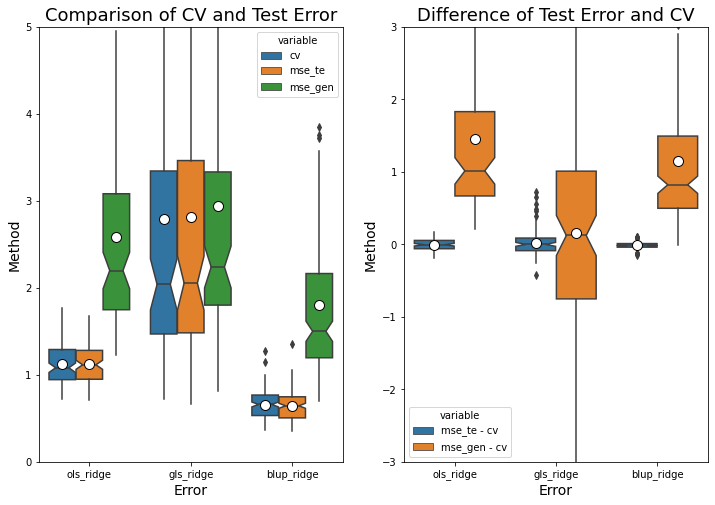

In [25]:
# Create the boxplot
plt.close('all')
fig, ax = plt.subplots(1,2, figsize=(12, 8))

gfg = sns.boxplot(x='method', y='value', hue='variable',data=ridge_melted, showmeans=True, 
            notch=True, showcaps=False,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"},
                       ax = ax[0])
gfg.set_ylim(0, 5)
ax[0].set_ylabel('Method', size=14)
ax[0].set_xlabel('Error', size=14)
ax[0].set_title('Comparison of CV and Test Error', size=18)

gfg = sns.boxplot(x='method', y='value', hue='variable',
            data=ridge_diff_melted, showmeans=True, 
            notch=True, showcaps=False,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"},
                       ax = ax[1])
gfg.set_ylim(-3, 3)
ax[1].set_ylabel('Method', size=14)
ax[1].set_xlabel('Error', size=14)
ax[1].set_title('Difference of Test Error and CV', size=18)

## Correction

In [26]:
ols_df.columns

Index(['cv', 'cv_hcv', 'using_time', 'mse_te', 'mse_gen', 'w_gen', 'w_te',
       'w_resample'],
      dtype='object')

In [40]:
import scipy.stats as stats
def anova_for_cvc(df):
    cvc = df['cv'] + df['w_te']
    _, p_cv_cvc = stats.f_oneway(df['cv'], cvc)
    cvcgen = df['cv'] + df['w_gen']
    _, p_cv_cv_gen = stats.f_oneway(df['cv'], cvcgen)
    _, p_cvc_te= stats.f_oneway(cvc, df['mse_te'])
    _, p_cvc_gen= stats.f_oneway(cvcgen, df['mse_gen'])
    correction_ratio_te = np.mean(df['w_te'] )/np.mean(df['mse_te'] - df['cv'])
    correction_ratio_te2 = np.mean(df['w_te'] /(df['mse_te'] - df['cv']))
    correction_ratio_gen = np.mean(df['w_gen'] )/np.mean(df['mse_gen'] - df['cv'])
    correction_ratio_gen2 = np.mean(df['w_gen'] /(df['mse_gen'] - df['cv']))
    return {
        # 'cv_cvcte':p_cv_cvc,
            'cv_cvcgen': p_cv_cv_gen,
            # 'cvcte_te':p_cvc_te,
            'cvcgen_tegen': p_cvc_gen,
            'correction_ratio_te': correction_ratio_te ,
            'correction_ratio_te2': correction_ratio_te2 ,
            'correction_ratio_gen': correction_ratio_gen,
            'correction_ratio_gen2': correction_ratio_gen2
            }

In [61]:
# np.mean(gls_df['mse_gen'] - gls_df['cv'])
print((gls_df['w_gen']/(gls_df['mse_gen'] - gls_df['cv'])).to_list().index(-720.6836593016948))
print(((gls_df['mse_gen'] - gls_df['cv'])).to_list()[34])
print((gls_df['w_gen']).to_list()[34])

34
-0.0003014233207744299
0.2172308618145847


In [28]:
def correction_df_preparation(df, method_name):
    print(df.columns)
    temp = df.drop(['using_time', 'cv_hcv', 'w_te', 'w_resample', 'w_gen'],axis=1, inplace=False)
    new_df = temp
    new_df['cv_w_te'] = df['cv'] + df['w_te']
    new_df['cv_w_gen'] = df['cv'] + df['w_gen']
   #  new_df['cv_w_resample'] = df['cv'] + df['w_resample']
    print(new_df.columns)
    new_df = new_df[['cv', 'cv_w_te',  'mse_te', 'cv_w_gen','mse_gen']]
      #  'cv_w_resample']]
    new_df['method'] = method_name
    
    # new_df_diff = df[['w_te','w_resample', 'w_gen']]
    new_df_diff = df[['w_te', 'w_gen']]
    new_df_diff['mse_te - w_te'] = df['mse_te'] - new_df['cv_w_te']
    new_df_diff['mse_gen - w_gen'] = df['mse_gen'] - new_df['cv_w_gen']
    new_df_diff['method'] = method_name
    return new_df, new_df_diff


### Correction for non-regularization method

In [41]:
ols_df_new, ols_diff = correction_df_preparation(ols_df, 'ols')
gls_df_new, gls_diff = correction_df_preparation(gls_df, 'gls')
blup_df_new, blup_diff = correction_df_preparation(blup_df, 'blup')

Index(['cv', 'cv_hcv', 'using_time', 'mse_te', 'mse_gen', 'w_gen', 'w_te',
       'w_resample'],
      dtype='object')
Index(['cv', 'mse_te', 'mse_gen', 'cv_w_te', 'cv_w_gen'], dtype='object')
Index(['cv', 'cv_hcv', 'using_time', 'mse_te', 'mse_gen', 'w_gen', 'w_te',
       'w_resample'],
      dtype='object')
Index(['cv', 'mse_te', 'mse_gen', 'cv_w_te', 'cv_w_gen'], dtype='object')
Index(['cv', 'cv_hcv', 'using_time', 'mse_te', 'mse_gen', 'w_gen', 'w_te',
       'w_resample'],
      dtype='object')
Index(['cv', 'mse_te', 'mse_gen', 'cv_w_te', 'cv_w_gen'], dtype='object')


C:\Users\Archibald\AppData\Local\Temp\ipykernel_3268\3636166827.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['method'] = method_name
C:\Users\Archibald\AppData\Local\Temp\ipykernel_3268\3636166827.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_diff['mse_te - w_te'] = df['mse_te'] - new_df['cv_w_te']
C:\Users\Archibald\AppData\Local\Temp\ipykernel_3268\3636166827.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [42]:
print('ols anova:', anova_for_cvc(ols_df))
print('gls anova:', anova_for_cvc(gls_df))
print('blup anova:', anova_for_cvc(blup_df))

ols anova: {'cv_cvcgen': 2.2214615773930055e-25, 'cvcgen_tegen': 1.8342297560594332e-08, 'correction_ratio_te': 0.06429656304050801, 'correction_ratio_te2': 0.9254547745630718, 'correction_ratio_gen': 0.37047621390643937, 'correction_ratio_gen2': 0.7084007399568215}
gls anova: {'cv_cvcgen': 0.07981492177967807, 'cvcgen_tegen': 0.11542555360464181, 'correction_ratio_te': 1.3505377865981736, 'correction_ratio_te2': -0.4040509962440562, 'correction_ratio_gen': 0.4518023106790476, 'correction_ratio_gen2': -6.843746811310095}
blup anova: {'cv_cvcgen': 4.0031422159672426e-50, 'cvcgen_tegen': 7.74966911134472e-06, 'correction_ratio_te': 1.4395186356400205, 'correction_ratio_te2': 0.595658814360437, 'correction_ratio_gen': 0.5431215155326151, 'correction_ratio_gen2': 0.9913339654311131}


In [31]:
non_reg_method_c = pd.concat([ols_df_new,gls_df_new,blup_df_new])
non_reg_method_c_long = non_reg_method_c.melt(id_vars='method')
non_reg_diff_c = pd.concat([ols_diff,gls_diff,blup_diff])
non_reg_diff_c_long = non_reg_diff_c.melt(id_vars='method')

Text(0.5, 1.0, 'Difference of Test Error and CV')

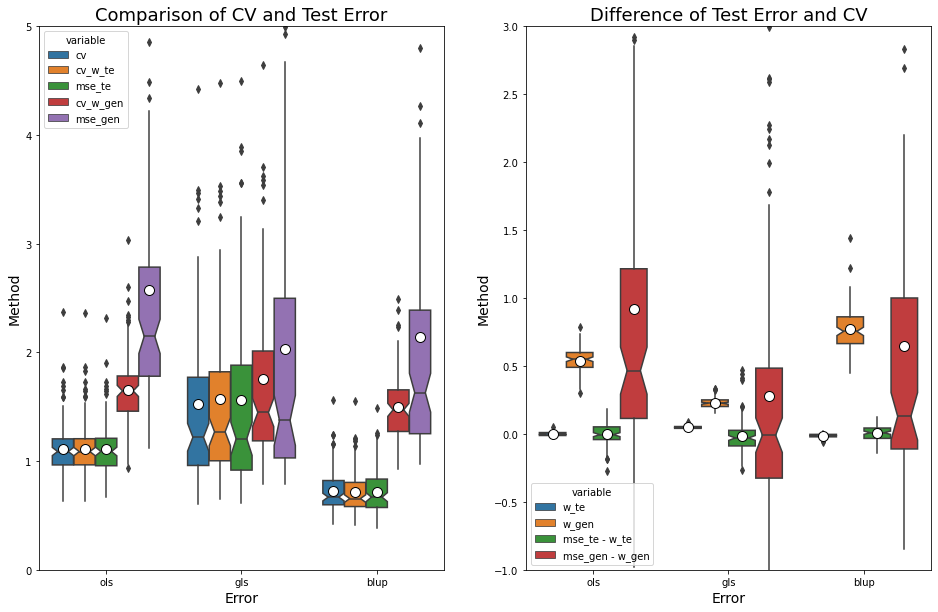

In [32]:
# Create the boxplot
plt.close('all')
fig, ax = plt.subplots(1,2, figsize=(16, 10))

gfg = sns.boxplot(x='method', y='value', hue='variable',
            data=non_reg_method_c_long, showmeans=True, 
            notch=True, showcaps=False,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"},
                       ax = ax[0])
ax[0].set_ylabel('Method', size=14)
ax[0].set_xlabel('Error', size=14)
ax[0].set_title('Comparison of CV and Test Error', size=18)
gfg.set_ylim(0, 5)

gfg=sns.boxplot(x='method', y='value', hue='variable',
            data=non_reg_diff_c_long, showmeans=True, 
            notch=True, showcaps=False,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"},
                       ax = ax[1])
gfg.set_ylim(-1, 3)
ax[1].set_ylabel('Method', size=14)
ax[1].set_xlabel('Error', size=14)
ax[1].set_title('Difference of Test Error and CV', size=18)

### Ridge with Blup

In [33]:
ols_ridge_new, ols_ridge_diff = correction_df_preparation(ols_ridge, 'ols_ridge')
gls_ridge_new, gls_ridge_diff = correction_df_preparation(gls_ridge, 'gls_ridge')
blup_ridge_new, blup_ridge_diff = correction_df_preparation(blup_ridge, 'blup_ridge')

Index(['cv', 'cv_hcv', 'using_time', 'mse_te', 'mse_gen', 'w_gen', 'w_te',
       'w_resample'],
      dtype='object')
Index(['cv', 'mse_te', 'mse_gen', 'cv_w_te', 'cv_w_gen'], dtype='object')
Index(['cv', 'cv_hcv', 'using_time', 'mse_te', 'mse_gen', 'w_gen', 'w_te',
       'w_resample'],
      dtype='object')
Index(['cv', 'mse_te', 'mse_gen', 'cv_w_te', 'cv_w_gen'], dtype='object')
Index(['cv', 'cv_hcv', 'using_time', 'mse_te', 'mse_gen', 'w_gen', 'w_te',
       'w_resample'],
      dtype='object')
Index(['cv', 'mse_te', 'mse_gen', 'cv_w_te', 'cv_w_gen'], dtype='object')


C:\Users\Archibald\AppData\Local\Temp\ipykernel_3268\3636166827.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['method'] = method_name
C:\Users\Archibald\AppData\Local\Temp\ipykernel_3268\3636166827.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_diff['mse_te - w_te'] = df['mse_te'] - new_df['cv_w_te']
C:\Users\Archibald\AppData\Local\Temp\ipykernel_3268\3636166827.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [43]:
print('ols anova:', anova_for_cvc(ols_ridge))
print('gls anova:', anova_for_cvc(gls_ridge))
print('blup anova:', anova_for_cvc(blup_ridge))

ols anova: {'cv_cvcgen': 1.5122071606695988e-35, 'cvcgen_tegen': 1.3479379564425546e-12, 'correction_ratio_te': -0.9103808063822405, 'correction_ratio_te2': -1.6303558678598122, 'correction_ratio_gen': 0.376122473127143, 'correction_ratio_gen2': 0.6150245643830925}
gls anova: {'cv_cvcgen': 0.2651826782526572, 'cvcgen_tegen': 0.5297814319889366, 'correction_ratio_te': 1.8073030466856232, 'correction_ratio_te2': -7.14217498546036, 'correction_ratio_gen': 2.198253673947318, 'correction_ratio_gen2': -0.08254786164469402}
blup anova: {'cv_cvcgen': 2.4132217257543284e-82, 'cvcgen_tegen': 1.4701082073146115e-07, 'correction_ratio_te': 0.9854708545881438, 'correction_ratio_te2': -0.24271554519165192, 'correction_ratio_gen': 0.6124232183444823, 'correction_ratio_gen2': 0.7493324227237781}


In [35]:
reg_method_c = pd.concat([ols_ridge_new,gls_ridge_new,blup_ridge_new])
reg_method_c_long = reg_method_c.melt(id_vars='method')
reg_diff_c = pd.concat([ols_ridge_diff,gls_ridge_diff,blup_ridge_diff])
reg_diff_c_long = reg_diff_c.melt(id_vars='method')

Text(0.5, 1.0, 'Difference of Test Error and CV')

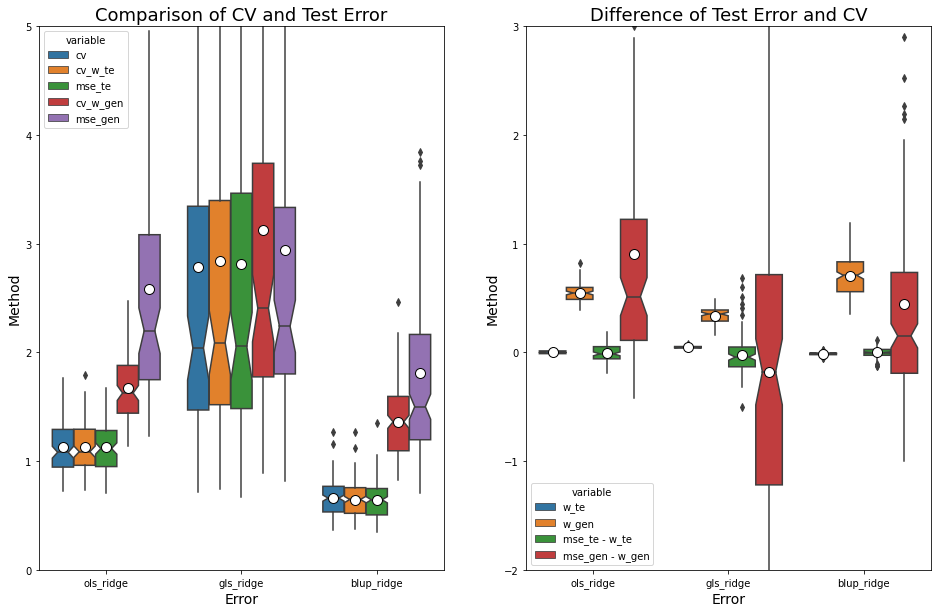

In [36]:
# Create the boxplot
plt.close('all')
fig, ax = plt.subplots(1,2, figsize=(16, 10))

gfg = sns.boxplot(x='method', y='value', hue='variable',
            data=reg_method_c_long, showmeans=True, 
            notch=True, showcaps=False,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"},
                       ax = ax[0])
ax[0].set_ylabel('Method', size=14)
ax[0].set_xlabel('Error', size=14)
ax[0].set_title('Comparison of CV and Test Error', size=18)
gfg.set_ylim(0, 5)

gfg=sns.boxplot(x='method', y='value', hue='variable',
            data=reg_diff_c_long, showmeans=True, 
            notch=True, showcaps=False,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"},
                       ax = ax[1])
gfg.set_ylim(-2, 3)
ax[1].set_ylabel('Method', size=14)
ax[1].set_xlabel('Error', size=14)
ax[1].set_title('Difference of Test Error and CV', size=18)

## Put all together

### table and graph

### Bias

In [4]:
dir = '../../simulation_output/usemaf/'
blup_100_100 = '../../simulation_output/usemaf/blup_0_reg_cv_correction_100_fixed_100_large.csv'
gls_100_100 = '../../simulation_output/usemaf/gls_0_reg_cv_correction_100_fixed_100_large.csv'
ols_100_100 = '../../simulation_output/usemaf/ols_0_reg_cv_correction_100_fixed_100_large.csv'

blup_df = pd.read_csv(blup_100_100)
gls_df = pd.read_csv(gls_100_100)
ols_df = pd.read_csv(ols_100_100)

ols_lasso_100_100= '../../simulation_output/usemaf/ols_10.0_reg_1.00_l1_cv__100_fixed_100_large.csv'
ols_enet_100_100= '../../simulation_output/usemaf/ols_10.0_reg_0.50_l1_cv__100_fixed_100_large.csv'
ols_ridge_100_100= '../../simulation_output/usemaf/ols_10.0_reg_0.00_l1_cv_correction_100_fixed_100_large.csv'
ols_ridge = pd.read_csv(ols_ridge_100_100)
ols_enet = pd.read_csv(ols_enet_100_100)
ols_lasso = pd.read_csv(ols_lasso_100_100)

gls_ridge_100_100 = '../../simulation_output/usemaf/gls_10.0_reg_0.00_l1_cv_correction_100_fixed_100_large.csv'
blup_ridge_100_100 = '../../simulation_output/usemaf/blup_10.0_reg_0.00_l1_cv_correction_100_fixed_100_large.csv'
ols_ridge_100_100= '../../simulation_output/usemaf/ols_10.0_reg_0.00_l1_cv_correction_100_fixed_100_large.csv'
ols_ridge = pd.read_csv(ols_ridge_100_100)
blup_ridge = pd.read_csv(blup_ridge_100_100)
gls_ridge = pd.read_csv(gls_ridge_100_100)

In [33]:
def bias_df_preparation(df, method_name):
    print(df.columns)
    temp = df.drop(['using_time'],axis=1, inplace=False)
    new_df = temp
    # new_df['cv_w_te'] = df['cv'] + df['w_te']
    # new_df['cv_w_gen'] = df['cv'] + df['w_gen']
   #  new_df['cv_w_resample'] = df['cv'] + df['w_resample']
    print(new_df.columns)
    new_df = new_df[['cv',   'mse_te', 'mse_gen']]
      #  'cv_w_resample']]
    new_df['method'] = method_name
    
    # new_df_diff = df[['w_te','w_resample', 'w_gen']]
    new_df_diff = pd.DataFrame()
    new_df_diff['mse_te - cv'] = (df['mse_te'] - df['cv'])/df['mse_te'] * 100
    new_df_diff['mse_gen - cv'] = (df['mse_gen'] - df['cv'])/df['mse_gen'] * 100
    new_df_diff['method'] = method_name
    return new_df, new_df_diff

In [195]:
ols_df_new, ols_diff = bias_df_preparation(ols_df, 'OLS')
gls_df_new, gls_diff = bias_df_preparation(gls_df, 'GLS')
blup_df_new, blup_diff = bias_df_preparation(blup_df, 'gBLUP')
gls_ridge_new, gls_ridge_diff = bias_df_preparation(gls_ridge, 'GLS+Ridge')
blup_ridge_new, blup_ridge_diff = bias_df_preparation(blup_ridge, 'gBLUP+Ridge')
ridge_new, ols_ridge_diff = bias_df_preparation(ols_ridge, 'Ridge')
enet_new, enet_diff = bias_df_preparation(ols_enet, 'ENET')
lasso_new, lasso_diff = bias_df_preparation(ols_lasso, 'Lasso')

Index(['cv', 'cv_hcv', 'using_time', 'mse_te', 'mse_gen', 'w_gen', 'w_te',
       'w_resample'],
      dtype='object')
Index(['cv', 'cv_hcv', 'mse_te', 'mse_gen', 'w_gen', 'w_te', 'w_resample'], dtype='object')
Index(['cv', 'cv_hcv', 'using_time', 'mse_te', 'mse_gen', 'w_gen', 'w_te',
       'w_resample'],
      dtype='object')
Index(['cv', 'cv_hcv', 'mse_te', 'mse_gen', 'w_gen', 'w_te', 'w_resample'], dtype='object')
Index(['cv', 'cv_hcv', 'using_time', 'mse_te', 'mse_gen', 'w_gen', 'w_te',
       'w_resample'],
      dtype='object')
Index(['cv', 'cv_hcv', 'mse_te', 'mse_gen', 'w_gen', 'w_te', 'w_resample'], dtype='object')
Index(['cv', 'cv_hcv', 'using_time', 'mse_te', 'mse_gen', 'w_gen', 'w_te',
       'w_resample'],
      dtype='object')
Index(['cv', 'cv_hcv', 'mse_te', 'mse_gen', 'w_gen', 'w_te', 'w_resample'], dtype='object')
Index(['cv', 'cv_hcv', 'using_time', 'mse_te', 'mse_gen', 'w_gen', 'w_te',
       'w_resample'],
      dtype='object')
Index(['cv', 'cv_hcv', 'mse_te', 'mse

C:\Users\Archibald\AppData\Local\Temp\ipykernel_26636\3712790477.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['method'] = method_name
C:\Users\Archibald\AppData\Local\Temp\ipykernel_26636\3712790477.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['method'] = method_name
C:\Users\Archibald\AppData\Local\Temp\ipykernel_26636\3712790477.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [196]:
df_bias = pd.concat([
    ols_df_new, gls_df_new, blup_df_new,  gls_ridge_new, blup_ridge_new, ridge_new, enet_new, lasso_new
])
df_bias_diff = pd.concat([
    ols_diff, gls_diff, blup_diff,  gls_ridge_diff, blup_ridge_diff, ols_ridge_diff, enet_diff, lasso_diff
])
df_bias_long = df_bias.melt(id_vars='method')
df_bias_diff_long = df_bias_diff.melt(id_vars='method')



In [197]:
print(df_bias_long['variable'].unique())
print(df_bias_diff_long['variable'].unique())

['cv' 'mse_te' 'mse_gen']
['mse_te - cv' 'mse_gen - cv']


In [198]:
name1 = {'cv':'CV', 'mse_te':'MSE_test', 'mse_gen':'MSE_gold'}
name2 = {'mse_te - cv': '(MSE_test - CV)/MSE_test', 'mse_gen - cv':'(MSE_gold - CV)/MSE_gold'}
df_bias_long.replace(name1, inplace=True)
df_bias_diff_long.replace(name2, inplace=True)

Text(0.5, 1.0, 'b. Percentage of CV Bias')

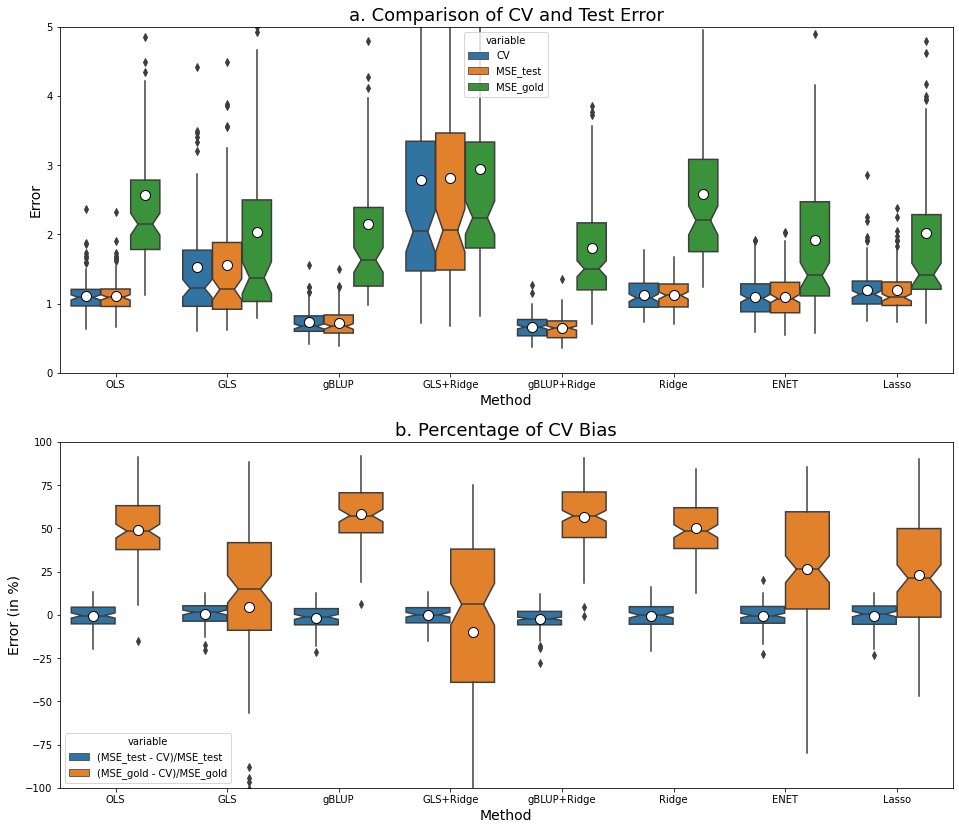

In [199]:
# Create the boxplot
plt.close('all')
fig, ax = plt.subplots(2,1, figsize=(16, 14))

gfg = sns.boxplot(x='method', y='value', hue='variable',
            data=df_bias_long, showmeans=True, 
            notch=True, showcaps=False,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"},
                       ax = ax[0]
                       )
ax[0].set_ylabel('Error', size=14)
ax[0].set_xlabel('Method', size=14)
ax[0].set_title('a. Comparison of CV and Test Error', size=18)
gfg.set_ylim(0, 5)

gfg=sns.boxplot(x='method', y='value', hue='variable',
            data=df_bias_diff_long, showmeans=True, 
            notch=True, showcaps=False,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"},
                       ax = ax[1])
gfg.set_ylim(-100,100)
ax[1].set_ylabel('Error (in %)', size=14)
ax[1].set_xlabel('Method', size=14)
ax[1].set_title('b. Percentage of CV Bias', size=18)

### CV correction

In [155]:
def correction_df_preparation(df, method_name):
    print(df.columns)
    temp = df.drop(['using_time', 'cv_hcv', 'w_te', 'w_resample', 'w_gen'],axis=1, inplace=False)
    new_df = temp
    new_df['cv_w_te'] = df['cv'] + df['w_te']
    new_df['cv_w_gen'] = df['cv'] + df['w_gen']
   #  new_df['cv_w_resample'] = df['cv'] + df['w_resample']
    print(new_df.columns)
    new_df = new_df[['cv', 'cv_w_te',  'mse_te', 'cv_w_gen','mse_gen']]
      #  'cv_w_resample']]
    new_df['method'] = method_name
    
    # new_df_diff = df[['w_te','w_resample', 'w_gen']]
    new_df_diff = pd.DataFrame()
    
    new_df_diff['w_te / mse_te'] = (df['w_te'])/df['mse_te'] * 100
    new_df_diff['w_gen / mse_gen'] = (df['w_gen'])/df['mse_gen'] * 100
    new_df_diff['method'] = method_name
    return new_df, new_df_diff


In [156]:
ols_df_new, ols_diff = correction_df_preparation(ols_df, 'ols')
gls_df_new, gls_diff = correction_df_preparation(gls_df, 'gls')
blup_df_new, blup_diff = correction_df_preparation(blup_df, 'blup')
gls_ridge_new, gls_ridge_diff = correction_df_preparation(gls_ridge, 'gls_ridge')
blup_ridge_new, blup_ridge_diff = correction_df_preparation(blup_ridge, 'blup_ridge')
ridge_new, ols_ridge_diff = correction_df_preparation(ols_ridge, 'ridge')

Index(['cv', 'cv_hcv', 'using_time', 'mse_te', 'mse_gen', 'w_gen', 'w_te',
       'w_resample'],
      dtype='object')
Index(['cv', 'mse_te', 'mse_gen', 'cv_w_te', 'cv_w_gen'], dtype='object')
Index(['cv', 'cv_hcv', 'using_time', 'mse_te', 'mse_gen', 'w_gen', 'w_te',
       'w_resample'],
      dtype='object')
Index(['cv', 'mse_te', 'mse_gen', 'cv_w_te', 'cv_w_gen'], dtype='object')
Index(['cv', 'cv_hcv', 'using_time', 'mse_te', 'mse_gen', 'w_gen', 'w_te',
       'w_resample'],
      dtype='object')
Index(['cv', 'mse_te', 'mse_gen', 'cv_w_te', 'cv_w_gen'], dtype='object')
Index(['cv', 'cv_hcv', 'using_time', 'mse_te', 'mse_gen', 'w_gen', 'w_te',
       'w_resample'],
      dtype='object')
Index(['cv', 'mse_te', 'mse_gen', 'cv_w_te', 'cv_w_gen'], dtype='object')
Index(['cv', 'cv_hcv', 'using_time', 'mse_te', 'mse_gen', 'w_gen', 'w_te',
       'w_resample'],
      dtype='object')
Index(['cv', 'mse_te', 'mse_gen', 'cv_w_te', 'cv_w_gen'], dtype='object')
Index(['cv', 'cv_hcv', 'using_time'

C:\Users\Archibald\AppData\Local\Temp\ipykernel_26636\545059207.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['method'] = method_name
C:\Users\Archibald\AppData\Local\Temp\ipykernel_26636\545059207.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['method'] = method_name
C:\Users\Archibald\AppData\Local\Temp\ipykernel_26636\545059207.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [185]:
df = pd.concat([
    ols_df_new, gls_df_new, blup_df_new,  gls_ridge_new, blup_ridge_new, ridge_new
])
df_diff = pd.concat([
    ols_diff, gls_diff, blup_diff,  gls_ridge_diff, blup_ridge_diff, ols_ridge_diff
])
df_long = df.melt(id_vars='method')
df_diff_long = df_diff.melt(id_vars='method')


In [168]:
print(df_long['variable'].unique())
print(df_diff_long['variable'].unique())

['cv' 'cv_w_te' 'mse_te' 'cv_w_gen' 'mse_gen']
['w_te / mse_te' 'w_gen / mse_gen']


In [186]:
name1 = {'cv':'CV', 'mse_te':'MSE_test', 'mse_gen':'MSE_gold', 'cv_w_te':'w_gold','cv_w_te': 'w_test'}
name2 = {'w_te / mse_te': 'w_test/MSE_test', 'w_gen / mse_gen':'w_gold/MSE_gold'}
df_long.replace(name1, inplace=True)
df_diff_long.replace(name2, inplace=True)

Text(0.5, 1.0, 'b. Percentage of Correction')

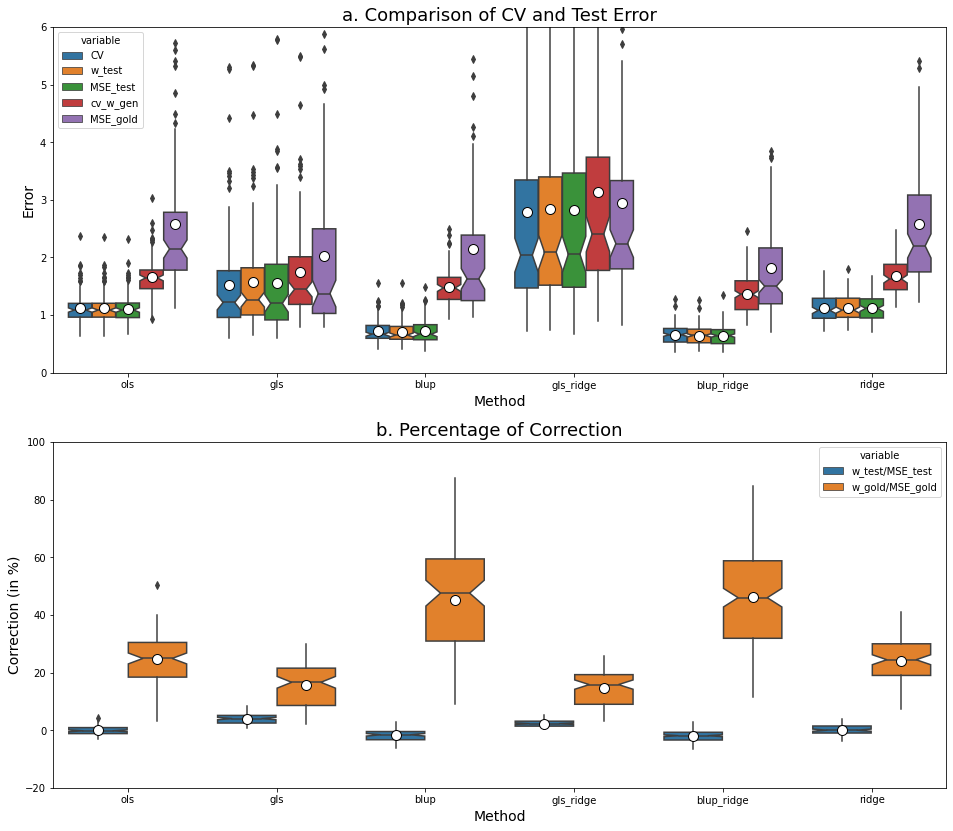

In [189]:
# Create the boxplot
plt.close('all')
fig, ax = plt.subplots(2,1, figsize=(16, 14))

gfg = sns.boxplot(x='method', y='value', hue='variable',
            data=df_long, showmeans=True, 
            notch=True, showcaps=False,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"},
                       ax = ax[0])
ax[0].set_ylabel('Error', size=14)
ax[0].set_xlabel('Method', size=14)
ax[0].set_title('a. Comparison of CV and Test Error', size=18)
gfg.set_ylim(0, 6)

gfg=sns.boxplot(x='method', y='value', hue='variable',
            data=df_diff_long, showmeans=True, 
            notch=True, showcaps=False,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"},
                       ax = ax[1])
gfg.set_ylim(-20,100)
ax[1].set_ylabel('Correction (in %)', size=14)
ax[1].set_xlabel('Method', size=14)
ax[1].set_title('b. Percentage of Correction', size=18)

### Create tables

table 1 ANOVA in the appendix

                ols    gls  gBLUP GLS+Ridge    gBLUP+Ridge  Ridge LASSO ENET

ANOVA(CV,MSE_te)

ANOVA(CV,MSE_gen)

ANOVA(CV, CV_c_te)

ANOVA(CV, CV_c_gen)

ANOVA(CV_c_gen, MSE_gen)


table 2 Average of the error results, and the correction ratio
            OLS GLS gBLUP GLS+Ridge gBLUP+Ridge Ridge
CV

CV_mean_eror

Averaged MSE test

Averaged MSE gen

Averaged CVc_te

Averaged CVc_gen

(CVc_gen- CV)/ MSE_gen * 100%




table 1 ANOVA in the appendix

                ols    gls  gBLUP GLS+Ridge    gBLUP+Ridge  Ridge LASSO ENET

ANOVA(CV,MSE_te)

ANOVA(CV,MSE_gen)

ANOVA(CV, CV_c_te)

ANOVA(CV, CV_c_gen)

ANOVA(CV_c_gen, MSE_gen)


table 2 Average of the error results, and the correction ratio
            OLS GLS gBLUP GLS+Ridge gBLUP+Ridge Ridge
CV

CV_mean_eror

Averaged MSE test

Averaged MSE gen

Averaged CVc_te

Averaged CVc_gen

(CVc_gen- CV)/ MSE_gen * 100%




table 1 ANOVA in the appendix

                ols    gls  gBLUP GLS+Ridge    gBLUP+Ridge  Ridge LASSO ENET

ANOVA(CV,MSE_te)

ANOVA(CV,MSE_gen)

ANOVA(CV, CV_c_te)

ANOVA(CV, CV_c_gen)

ANOVA(CV_c_gen, MSE_gen)


table 2 Average of the error results, and the correction ratio

            OLS GLS gBLUP GLS+Ridge gBLUP+Ridge Ridge
CV

CV_mean_eror

Averaged MSE test

Averaged MSE gen

Averaged CVc_te

Averaged CVc_gen

(CVc_gen- CV)/ MSE_gen * 100%

In [125]:
def error_ratio(df):
    cv = np.mean(df['cv'])
    mse_te = np.mean(df['mse_te'])
    mse_gen = np.mean(df['mse_gen'])

    re = {
        'cv':cv,
        'mse_te': mse_te,
        'mse_gen': mse_gen,
        'CVc_te' :0,
        'CVc_gen':0,
        'correct_te': 0,
        'correct_gen':0 
    }
    CVc_te = np.mean(df['cv']+df['w_te'])
    CVc_gen = np.mean(df['cv']+df['w_gen'])
    correction_te = np.mean( (df['w_te']/df['mse_te'])) * 100
    correction_gen = np.mean( (df['w_gen']/df['mse_gen'])) *100
    re = {
        'cv':cv,
        'mse_te': mse_te,
        'mse_gen': mse_gen,
        'CVc_te' :CVc_te,
        'CVc_gen':CVc_gen,
        'correct_te': correction_te,
        'correct_gen': correction_gen
    }
    return re
    

In [118]:
import scipy.stats as stats
def anova_for_cvc(df):
    _, p_cv_mse_te = stats.f_oneway(df['cv'], df['mse_te'])
    _, p_cv_mse_gen = stats.f_oneway(df['cv'], df['mse_gen'])

    dict = {'cv_mse_te': p_cv_mse_te,
             'mse_gen': p_cv_mse_gen,
            'cv_cvcte':0,
            'cv_cvcgen': 0,
                'cvc_mse_te':0,
                'cvc_mse_gen': 0,
             }
    try:
        cvc = df['cv'] + df['w_te']
        _, p_cv_cvc_te = stats.f_oneway(df['cv'], cvc)
        cvcgen = df['cv'] + df['w_gen']
        _, p_cv_cv_gen = stats.f_oneway(df['cv'], cvcgen)
        _, p_cvc_mse_te= stats.f_oneway(cvc, df['mse_te'])
        _, p_cvc_mse_gen= stats.f_oneway(cvcgen, df['mse_gen'])

        dict = {'cv_mse_te': p_cv_mse_te,
                'mse_gen': p_cv_mse_gen,
                'cv_cvcte':p_cv_cvc_te,
                'cv_cvcgen': p_cv_cv_gen,
                'cvc_mse_te':p_cvc_mse_te,
                'cvc_mse_gen': p_cvc_mse_gen,
                }
    except Exception:
        print(df.columns)
        print(Exception)
        
    return dict


In [119]:
def create_table(df_list:list, method:list, function):
    df = pd.DataFrame()
    for i in range(len(df_list)):
        dicti = function(df_list[i])
        # print(dicti.keys())
        new_df = pd.DataFrame(dicti, index=[0])
        df = pd.concat([df, new_df], axis = 0)
    
    df.index = method
    
    return df

In [120]:
method_list = [ols_df, gls_df, blup_df, gls_ridge, blup_ridge, ols_ridge, ols_enet, ols_lasso]
method = ['OLS', 'GLS', 'gBLUP','GLS+Ridge', 'gBLUP+Ridge', 'Ridge', 'ENET', 'LASSO']
anova_table = create_table(method_list, method, anova_for_cvc)

Index(['cv', 'using_time', 'mse_te', 'mse_gen'], dtype='object')
<class 'Exception'>
Index(['cv', 'using_time', 'mse_te', 'mse_gen'], dtype='object')
<class 'Exception'>


In [124]:
print(anova_table.T.to_latex(float_format="%.4e"))

\begin{tabular}{lrrrrrrrr}
\toprule
{} &        OLS &        GLS &      gBLUP &  GLS+Ridge &  gBLUP+Ridge &      Ridge &       ENET &      LASSO \\
\midrule
cv\_mse\_te   & 9.2902e-01 & 7.9389e-01 & 7.5927e-01 & 9.3086e-01 &   4.7095e-01 & 9.5348e-01 & 9.3994e-01 & 9.3809e-01 \\
mse\_gen     & 1.3052e-17 & 4.3667e-03 & 6.4149e-20 & 5.9709e-01 &   8.7941e-37 & 3.9412e-26 & 7.5485e-13 & 2.2050e-08 \\
cv\_cvcte    & 9.9546e-01 & 7.1138e-01 & 6.5705e-01 & 8.7396e-01 &   4.6508e-01 & 9.5726e-01 & 0.0000e+00 & 0.0000e+00 \\
cv\_cvcgen   & 2.2215e-25 & 7.9815e-02 & 4.0031e-50 & 2.6518e-01 &   2.4132e-82 & 1.5122e-35 & 0.0000e+00 & 0.0000e+00 \\
cvc\_mse\_te  & 9.3342e-01 & 9.2701e-01 & 8.9199e-01 & 9.4421e-01 &   9.9159e-01 & 9.1115e-01 & 0.0000e+00 & 0.0000e+00 \\
cvc\_mse\_gen & 1.8342e-08 & 1.1543e-01 & 7.7497e-06 & 5.2978e-01 &   1.4701e-07 & 1.3479e-12 & 0.0000e+00 & 0.0000e+00 \\
\bottomrule
\end{tabular}



C:\Users\Archibald\AppData\Local\Temp\ipykernel_26636\3508437423.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(anova_table.T.to_latex(float_format="%.4e"))


In [126]:
method_list = [ols_df, gls_df, blup_df, gls_ridge, blup_ridge, ols_ridge]
method = ['OLS', 'GLS', 'gBLUP','GLS+Ridge', 'gBLUP+Ridge', 'Ridge' ]
ratio_table = create_table(method_list, method, error_ratio)

In [129]:
print(ratio_table.T.to_latex(float_format="%.2f"))

\begin{tabular}{lrrrrrr}
\toprule
{} &   OLS &   GLS &  gBLUP &  GLS+Ridge &  gBLUP+Ridge &  Ridge \\
\midrule
cv          &  1.12 &  1.53 &   0.73 &       2.79 &         0.66 &   1.13 \\
mse\_te      &  1.11 &  1.56 &   0.72 &       2.82 &         0.64 &   1.13 \\
mse\_gen     &  2.57 &  2.03 &   2.14 &       2.94 &         1.81 &   2.58 \\
CVc\_te      &  1.12 &  1.57 &   0.71 &       2.84 &         0.64 &   1.13 \\
CVc\_gen     &  1.66 &  1.76 &   1.50 &       3.13 &         1.36 &   1.68 \\
correct\_te  &  0.02 &  3.99 &  -1.79 &       2.32 &        -1.99 &   0.18 \\
correct\_gen & 24.71 & 15.61 &  45.02 &      14.64 &        46.13 &  24.18 \\
\bottomrule
\end{tabular}



C:\Users\Archibald\AppData\Local\Temp\ipykernel_26636\1058784222.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(ratio_table.T.to_latex(float_format="%.2f"))
